In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.empty((100,2))

In [5]:
X[:,0] = np.random.uniform(0.,100.,size=100)
X[:,1] = 0.75 * X[:,0] + 3. + np.random.normal(0,10.,size=100)

In [6]:
def demean(X):
    return X - np.mean(X,axis=0)

X = demean(X)

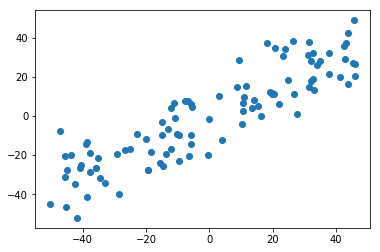

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
def f(w,X):
    return np.sum((X.dot(w)**2)) / len(X)

def df(w,X):
    return X.T.dot(X.dot(w)) * 2. / len(X)

def direction(w):
    return w / np.linalg.norm(w)

def first_component(X,initial_w,eta,n_iters=1e4,epsilon=1e-8):
    
    w = direction(initial_w)
    cur_iter = 0
    
    while cur_iter < n_iters:
        gradient = df(w,X)
        last_w = w
        w = w + eta * gradient
        w = direction(w)
        if(abs(f(w,X) - f(last_w,X)) < epsilon):
            break
        
        cur_iter += 1
    
    return w

In [10]:
initial_w = np.random.random(X.shape[1])
eta = 0.01
w = first_component(X,initial_w,eta)
w

array([0.78214787, 0.62309286])

In [11]:
X2 = np.empty(X.shape)

In [12]:
for i in range(len(X)):
    X2[i] = X[i] - X[i].dot(w) * w

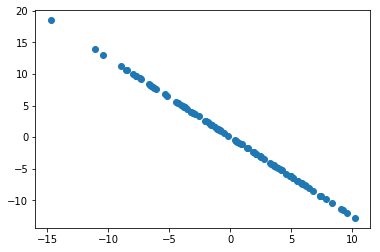

In [14]:
plt.scatter(X2[:,0],X2[:,1])

In [15]:
w2 = first_component(X2,initial_w,eta)
w2

array([ 0.62309463, -0.78214646])

In [16]:
w.dot(w2)

2.2649849933387145e-06

In [22]:
def first_n_component(n,X,eta=0.01,n_iters = 1e4,epsilon = 1e-8):
    
    X_pca = X.copy()
    X_pca = demean(X_pca)
    res = []
    for i in range(n):
        initial_w = np.random.random(X_pca.shape[1])
        w = first_component(X_pca,initial_w,eta)
        res.append(w)
        
        X_pca = X_pca - X_pca.dot(w).reshape(-1,1) * w
    
    return res

In [23]:
first_n_component(2,X)

[array([0.78214778, 0.62309297]), array([ 0.62309593, -0.78214543])]